<a href="https://colab.research.google.com/github/IrickMarvinGalan/CPE-031-Visualization-and-Data-Analysis/blob/main/HOA/HandsOn9_Exploring_Data_Visually_Galan_CpE21S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploring Data Visually**





---



**Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


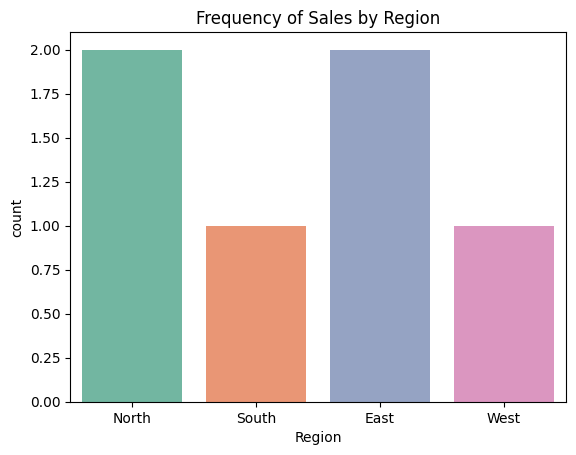

In [3]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


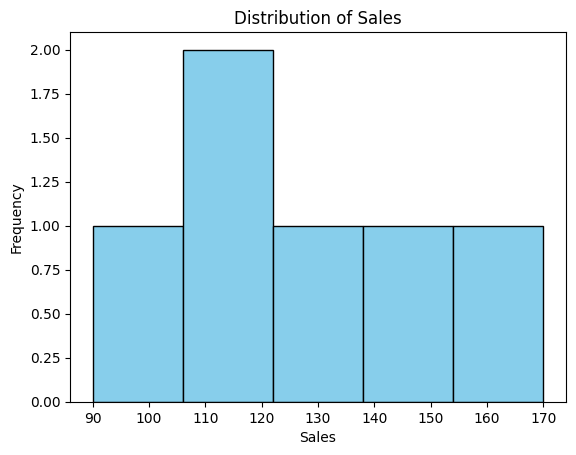

In [4]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-2705053784.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="Set2")


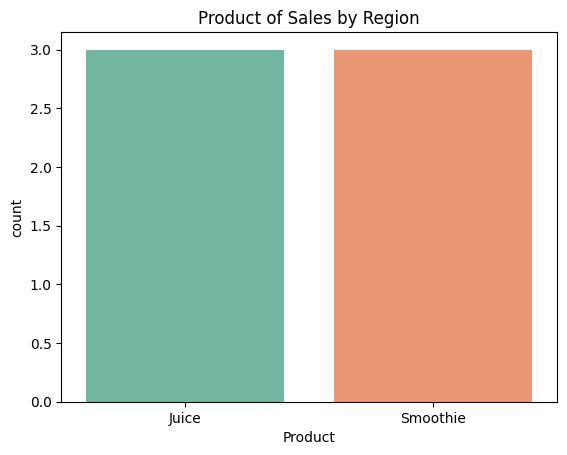

In [5]:
sns.countplot(x="Product", data=df, palette="Set2")
plt.title("Product of Sales by Region")
plt.show()

Interpretation: Here we could simply see that it counts the number of regions that sell juices and smoothies. Since there are 5 regions in total, 2 regions offer juices, and 2 regions offer smoothies, meanwhile the east region offers both resulting to an equal 3 regions having available juice products, and 3 regions also having available smoothie products

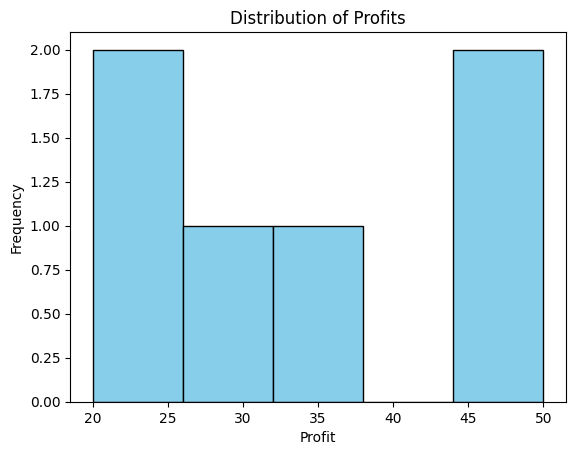

In [10]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Profit"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Profits")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Interpretation: In this histogram we could visualize the frequency of sales in a given profit interval. In the current number of bins the interval seems to be 6 units apart, if we want a more narrower interval then we would increase the number of bins to produce greater detail in data. However, it is important to take note that while creating narrow intervals may produce greater detail the downside is that it may produce too many intervals to interpret which may be more challenging to conclude from.

Section 2: Relationships Between Variables

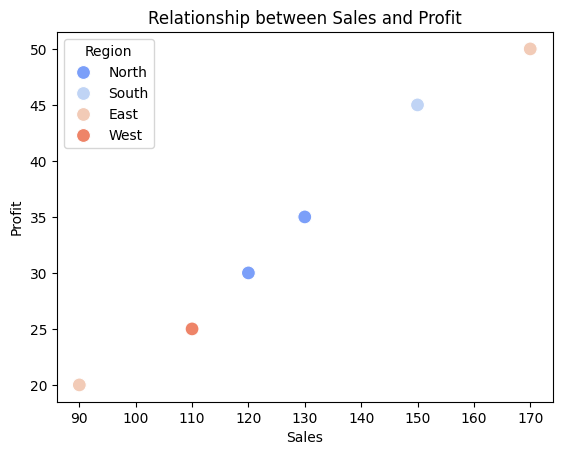

In [11]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [12]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

**Interpret whether higher sales also mean higher profit.** <br>
In this graph we could see a trend of the profit across number of sales, and it shows a positive correlation as both increase together at the same time, and this is intuitively correct as greater quantity sold literally brings more money in a company.

**Which region seems to perform best?** <br>
Meanwhile the region that seems to perform best is East. At first glance, it may seem that East is the lowest but it also performs in greatest sales for smoothie. However we will see in the crosstab that overall East performs best for both juices and smoothies.

Section 3: Analysis of Missing Data

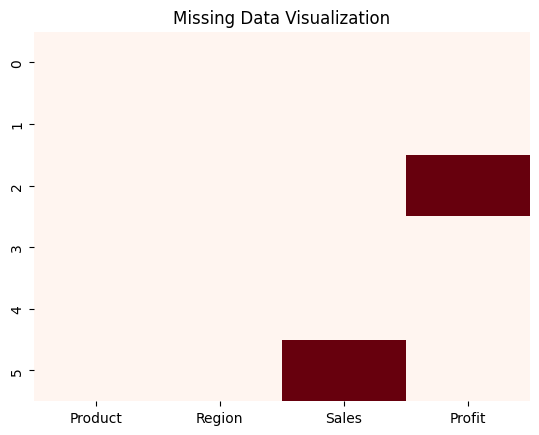

,0
Product,0
Region,0
Sales,1
Profit,1


In [22]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

**Describe what you observe in the missing data visualization. ** <br>
If we take a look at the visualization it seems like the ones colored red are the ones missing a data. If we look at the simulated NaN values assigned to loc 2 and 5 of the dataframe, it makes sense that the graph colors missing data differently to visualize a gap on the data set.

**Which variables need attention before analysis?** <br>
In this case, the data analyst may need to handle the data with more care as there are missing dataset rows which may affect the outcome of analyses.  These missing datapoints are row 2's profit, and row 5's sales which are both significant categories. It's either the analyst uses a different mathematical model to take into account missing values, or simply trim data that may cause error.

Section 4: Visualizing Time-Series Data

        Date  Sales
0 2024-01-01    181
1 2024-01-02    196
2 2024-01-03    184
3 2024-01-04    140
4 2024-01-05    130
5 2024-01-06     83
6 2024-01-07    156
7 2024-01-08    197
8 2024-01-09    105
9 2024-01-10    101


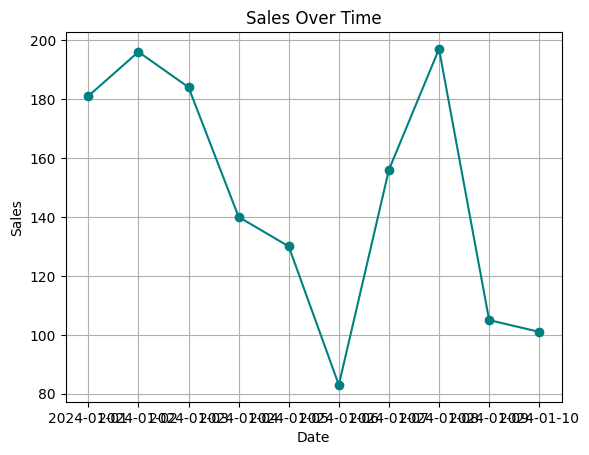

In [19]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})
print(ts_df)

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

0           NaN
1           NaN
2    187.000000
3    173.333333
4    151.333333
5    117.666667
6    123.000000
7    145.333333
8    152.666667
9    134.333333
Name: Sales, dtype: float64


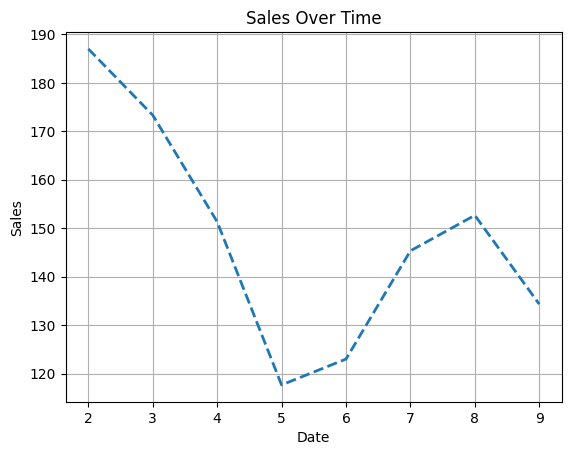

In [20]:
# Line chart for time-series
#plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")

temp_store = ts_df["Sales"].rolling(window=3).mean()
print(temp_store)
plt.plot(temp_store, label='moving average', linewidth='2', linestyle='--')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()



Interpretation: In this code the moving average was used to smoothen out the fluctuations in the data. A moving average is a form of averaging that averages the nearby consecutive data. This allows the analyst to interpret how smaller averages between neighboring data change across the graph.

Section 5: Visualizing Geospatial Data

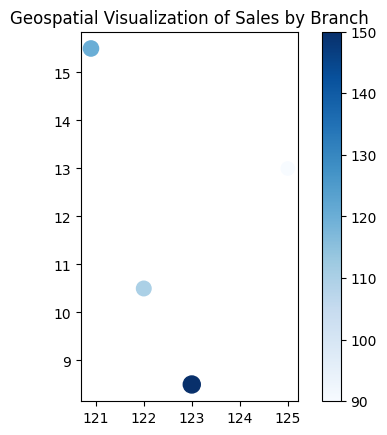

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

If we imagine a map using the actual coordinates above then we will see that most of the sales are in lower longitudes, which could imply near the equator. And the coordinate with highest sale is 123, 8.5 (lat, long) which is a portion of the south region.

It is evident in this data the usefulness of geospatial representation of data. If business analysts observe the graph, they could deduce that the smoothies or juices product sold were profitting more near equatorial positions such as the south at a 9 degree longitude. This is intuitively correct as equatorial countries may need more refreshments to combat heat.